(1) 데이터 가져오기

In [1]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(as_frame=True) # Pandas DataFrame을 사용
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [3]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
diabetes.data.head()
# 모든 값이 실수이므로 원-핫 인코딩 할 필요 없음

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
diabetes.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [7]:
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


(2) 모델에 입력할 데이터 X 준비하기

In [8]:
import numpy as np

X = np.array(df_X)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

(3) 모델에 예측할 데이터 y 준비하기

In [9]:
y = np.array(df_y)
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

(4) train 데이터와 test 데이터로 분리하기

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


(5) 모델 준비하기

In [12]:
W = np.random.rand(10)
b = np.random.rand()

In [67]:
def model(X, W, b):
  predictions = 0
  for i in range(9):
    predictions += X[:,i]*W[i]
  predictions += b
  return predictions

(6) 손실함수 loss 정의하기

In [68]:
def MSE(a, b):
  mse = ((a - b) ** 2).mean()
  return mse

In [69]:
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L

(7) 기울기를 구하는 gradient 함수 구현하기

In [70]:
def gradient(X, W, b, y):
  N = len(W)
  y_pred = model(X, W, b)
  dW = 1/N * (2 * np.dot(X.T, (y_pred - y)))
  db = 2 * (y_pred - y).mean()
  # print(dW, db)
  return dW, db

(8) 하이퍼 파라미터인 학습률 설정하기

In [80]:
LEARNING_RATE = 0.01

(9) 모델 학습하기

In [81]:
type(X_train)

numpy.ndarray

In [82]:
X_train.shape

(353, 10)

In [83]:
W

array([-2041.5187665 , -1742.70466279,  2411.94506907,  1367.73841619,
        -711.49599439, -1121.09998714,  -452.26978059,   -60.9769583 ,
        2066.65638424,  1766.41844946])

In [84]:
b

155.42039819895012

In [85]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 24933.1802
Iteration 200 : Loss 19288.4646
Iteration 300 : Loss 15131.9550
Iteration 400 : Loss 12058.4616
Iteration 500 : Loss 9777.4775
Iteration 600 : Loss 8078.9674
Iteration 700 : Loss 6810.1892
Iteration 800 : Loss 5859.5512
Iteration 900 : Loss 5145.1993
Iteration 1000 : Loss 4606.8758
Iteration 1100 : Loss 4200.0730
Iteration 1200 : Loss 3891.8132
Iteration 1300 : Loss 3657.5896
Iteration 1400 : Loss 3479.1384
Iteration 1500 : Loss 3342.8116
Iteration 1600 : Loss 3238.3837
Iteration 1700 : Loss 3158.1738
Iteration 1800 : Loss 3096.3975
Iteration 1900 : Loss 3048.6884
Iteration 2000 : Loss 3011.7419
Iteration 2100 : Loss 2983.0512
Iteration 2200 : Loss 2960.7097
Iteration 2300 : Loss 2943.2640
Iteration 2400 : Loss 2929.6031
Iteration 2500 : Loss 2918.8761
Iteration 2600 : Loss 2910.4290
Iteration 2700 : Loss 2903.7584
Iteration 2800 : Loss 2898.4757
Iteration 2900 : Loss 2894.2799
Iteration 3000 : Loss 2890.9377
Iteration 3100 : Loss 2888.2673
Iteration 320

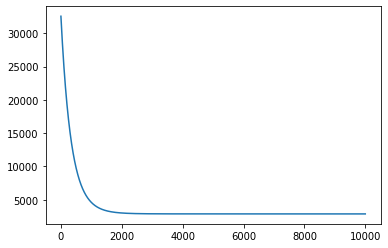

In [86]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

(10) test 데이터에 대한 성능 확인하기

In [87]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2945.5568409343023

(11) 정답 데이터와 예측한 데이터 시각화하기

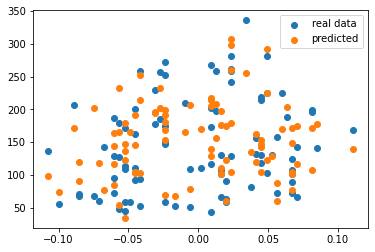

In [89]:
plt.scatter(X_test[:, 0], y_test, label='real data')
plt.scatter(X_test[:, 0], prediction, label='predicted')
plt.legend()
plt.show()